In [1]:
# jupyter nbconvert --to markdown --TemplateExporter.exclude_input=True  relatorio-final.ipynb 
# mdpdf README.md

# Relatório Final

### Supercomputação - 2021.1

## **O problema**

O problema `Maximin Share` é um problema *NP-difícil*. Sua resolução visa encontrar a distribuição mais igualitária possível de `N` objetos para `M` pessoas. É possível que determinadas pessoas acabem com mais objetos que outras ou também com maior valor acumulado que outras, uma vez que os objetos são indivisíveis. Esse problema, portanto, visa definir qual o *menor* valor que uma pessoa deveria aceitar. Basicamente, queremos maximizar o valor da pessoa que terá o menor valor. Esse é o chamado MMS.

Para exemplificar o problema, temos 6 objetos e 3 pessoas. Cada objeto possui um valor associado a ele: 20, 11, 9, 13, 14, 37. Uma possível distribuição seria:

- Pessoa 1: itens 37 - valor total: 37;
- Pessoa 2: itens 20, 11 - valor total: 31;
- Pessoa 3: itens 14,  9, 13 - valor total: 36.

Tendo em vista que cada linha representa os objetos que cada pessoa recebeu, o MMS é 31 (pessoa do meio). No entanto, é possível distribuir esses objetos de modo a obter um melhor MMS: 

- Pessoa 1: itens 37 - valor total: 37;
- Pessoa 2: itens 20, 14 - valor total: 34;
- Pessoa 3: itens 13,  11, 9 - valor total: 33.

O MMS equivale a 33 (última pessoa), ou seja, essa distribuição é melhor que a outra, pois é mais igualitária.

## **Entradas e saídas**

Por padrão, todas as entradas seguem o formato:

```
N M
v1 ... vN
```

Sendo `N` o número de objetos, `M` o número de pessoas e `vi` o valor do objeto `i`.

O formato da saída desse programa é como segue:

```
MMS
objetos da pessoa 1
...
objetos da M
```

Sendo `MMS` o valor do grupo menos valioso e `objetos da pessoa j` a lista de índices dos objetos que a pessoa `j` recebeu nessa distribuição.

## **Soluções**

### Heurística: 

Cada pessoa deve receber ao menos `N/M` objetos (arredondado para baixo). Para a realização da distribuição, basta ordenar os itens por valor, decrescente, e atribuí-los para cada pessoa sequencialmente. Ao chegar na última pessoa, é preciso voltar para a primeira e continuar a distribuição até acabar os objetos. Para obter a MMS dessa solução basta verificar o valor total recebido pela última pessoa.

Exemplificando com o exemplo inicial:

- 3 pessoas
- 6 objetos de valores: 20, 11, 9, 13, 14, 37.

Ordenando os objetos por valor: 37, 20, 14, 13, 11, 9.

Distribuição:

- Pessoa 1: itens 37, 13 - valor total: 50;
- Pessoa 2: itens 20, 11 - valor total: 31;
- Pessoa 3: itens 14,  9 - valor total: 23.

Portanto, o MMS para essa solução é 23.

### Busca Local 

A solução local consiste em algumas etapas. Inicialmente, é preciso distribuir os objetos para as pessoas de forma aleatória. Em seguida, é preciso selecionar a pessoa P com o menor valor total e verficar para cada objeto se ele pode ser doado da pessoa que o tem para a pessoa P. Um objeto pode ser doado se o valor total do doador menos o valor do item doado for maior que o valor total da pessoa P.

Caso um objeto possa ser doado, faça a doação, recalcule o MMS e repita esse processo até não existir mais doações possíveis.

Exemplificando com o exemplo inicial:

- 3 pessoas
- 6 objetos de valores: 20, 11, 9, 13, 14, 37.

Fazer uma distribuição aleatória: 

- Pessoa 1: itens 20, 13 - valor total: 33;
- Pessoa 2: itens  9, 11 - valor total: 20;
- Pessoa 3: itens 14, 37 - valor total: 51.

P é a pessoa 2, pois tem o menor valor total (20). Verificando se algum item pode ser doado para ela:

- Objeto 1: 
    - valor: 20;
    - dono: 1;
    - valor do dono: 33.
    
    Se for doado para P:
        - valor do antigo dono: 13;
        - valor do novo dono: 40.
    
    Como 13 é menor que 40, essa troca não pode ocorrer.

- Objeto 5:
    - valor: 14;
    - dono: 3;
    - valor do dono: 51.
    
    Se for doado para P:
        - valor do antigo dono: 37;
        - valor do novo dono: 34.
    
    Como 37 é maior que 34, essa troca pode ocorrer. 
    
Então o novo MMS é 33, dada a nova distribuição:

- Pessoa 1: itens 20, 13 - valor total: 33;
- Pessoa 2: itens 9, 11, 14 - valor total: 34;
- Pessoa 3: itens 37 - valor total: 37.

As verificações de troca devem ser feitas novamente até não ser possível. Com a distribuição atual não é possível realizar mais trocas, portanto essa seria uma possível resolução local. O próximo passo consiste em repetir todas as etapas algumas vezes e escolher qual resolução apresenta o maior MMS.

### Busca Local em CPU e GPU

As etapas da busca local são as mesmas. O paralelismo tem o objetivo de acelerar o processo de geração de resoluções possíveis e escolher a melhor. 

### Busca exaustiva

Utilizando recursão, é possível gerar todas as distribuições possíveis dados N itens e M pessoas, obtendo M^N distribuições. Basta escolher como resolução a distribuição em que o MMS é máximo.
    
Para 3 itens de valores 11, 37, 20 e 2 pessoas (representadas por 0 e 1) as seguintes distribuições são possíveis:


| Item 37 | Item 20 | Item 11 | Valor 0 | Valor 1 |
|:-------:|:-------:|:-------:|:-------:|:-------:|
|    0    |    0    |    0    |   68    |    0    |
|    0    |    0    |    1    |   57    |   11    |    
|    0    |    1    |    0    |   48    |   20    |
|    0    |    1    |    1    |   37    |   31    |
|    1    |    0    |    0    |   11    |   57    |
|    1    |    0    |    1    |   20    |   48    |
|    1    |    1    |    0    |   11    |   57    |
|    1    |    1    |    1    |   0     |   68    |

O MMS nessa situação é 31. É possível perceber que existem casos "espelhados", que acabam consumindo recursos desnecessariamente. 

A descrição acima dá a entender que quanto mais itens e mais pessoas mais possibilidades serão processadas e maior tempo será consumido para execução. Para contornar essa desvantagem, é possível determinar um valor de corte para parar a execução caso a distribuição seja "ruim". O método consiste em ordenar os itens por valor (decrescente) e, durate a distribuição, verificar se a pessoa atual possui valor maior que o valor de corte. Caso a condição seja verdade, essa distribuição já irá levar a um cenário não ótimo, então pode ser pulada.

Exemplificando:

Valor de corte: (37 + 20 + 11)/2 = 34: 

| Item 37 | Item 20 | Item 11 | Valor 0 | Valor 1 |
|:-------:|:-------:|:-------:|:-------:|:-------:|
|    0    |    0    |    -    |   57    |    0    | 
    
*obs: "-" ainda não distribuído.*
    
Portanto, nem é necessário realizar a distribuição do item 11.

## **Testes**

Para avaliar o desempenho das soluções anteriores foram geradas entradas variando `N` (e `M` fixo) e outras com `M` variando (e `N` fixo). Essa decisão foi feita para facilitar a visualização e interpretação dos resultados. Submetendo cada um dos algoritmos aos mesmos testes garante que os resultados finais serão justos em relação ao tempo de execução. Além disso, permitem comparar os MMSs obtidos para cada algortimo, a fim de determinar qual o melhor método para resolução do `Maximin Share`.

Vale ressaltar que os algoritmos de busca local, sejam eles sequencial, paralelo em CPU e GPU, repetem a busca 100000 vezes. Isso ocorre com a finalidade de obter uma solução local que equivale a um ponto de máximo global.

Os testes foram realizados em uma máquina com CPU de 4 *cores* (Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz) e uma GPU com 384 CUDA cores (GeForce 940MX). 

In [2]:
%matplotlib inline
import time
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

In [3]:
execs = [
    'heuristico/heuristico',
    'busca-local/local',
    'busca-global/global',
    'busca-local/local-omp',
    'busca-local/local-gpu',
]

def getInputFiles(str_format, directory="testes_relatorio/"):
    ins = []
    os.chdir(directory)
    for file in glob.glob(str_format):
        ins += [directory + file]
    os.chdir('..')
    return ins

In [4]:
def executeAndParseResults(executavel, arquivo_in):
    with open(f'{arquivo_in}') as f:
        entrada = f.read()
        entrada__ = entrada.split()
        entrada__r = {'N': int(entrada__[0]), 'M': int(entrada__[1])}
        timeout = 600
        start = time.perf_counter()
        try:
            proc = subprocess.run([executavel], input=entrada, text=True, capture_output=True, timeout=timeout)
        except:
            return None
        end = time.perf_counter()

    entrada = entrada.split()
    entrada_r = {'N': entrada[0], 'M': entrada[1]}
    
    std = proc.stdout
    stdout = std.split()
    
    resultados = {'MMS': stdout[0]}
    
    execTime = end-start
    return (entrada_r, resultados, execTime)

def geraDF(executavel, ins):
    resultados = []
    for i in ins:
        res = executeAndParseResults(executavel, i)
        if res != None:
            resultados.append(res)
        
    df = pd.DataFrame()
    df['T'] = [i[2] for i in resultados]
    df['N'] = [int(i[0]['N']) for i in resultados]
    df['M'] = [int(i[0]['M']) for i in resultados]
    df['MMS'] = [int(i[1]['MMS']) for i in resultados]
    
    return df

### Testes executados em todas as soluções, com M fixo:

In [5]:
insGlobal_M_fixo = getInputFiles("in*_M_global.txt")

resHeuristicoGlobal_M_fixo = geraDF(execs[0], insGlobal_M_fixo)
resLocalGlobal_M_fixo = geraDF(execs[1], insGlobal_M_fixo)
resGlobalGlobal_M_fixo = geraDF(execs[2], insGlobal_M_fixo)

dfGlobalM = pd.DataFrame()
dfGlobalM['N'] = resLocalGlobal_M_fixo['N']
dfGlobalM['M'] = resLocalGlobal_M_fixo['M']

dfGlobalM['MMS_Heuristico'] = resHeuristicoGlobal_M_fixo['MMS']
dfGlobalM['T_Heuristico'] = resHeuristicoGlobal_M_fixo['T']

dfGlobalM['MMS_Local'] = resLocalGlobal_M_fixo['MMS']
dfGlobalM['T_Local'] = resLocalGlobal_M_fixo['T']

dfGlobalM['MMS_Global'] = resGlobalGlobal_M_fixo['MMS']
dfGlobalM['T_Global'] = resGlobalGlobal_M_fixo['T']

In [6]:
dfGlobalM.sort_values('N').tail(5)

,N,M,MMS_Heuristico,T_Heuristico,MMS_Local,T_Local,MMS_Global,T_Global
0,14,5,92,0.036494,130,0.066711,130,0.306619
12,15,5,146,0.004484,184,0.072155,184,14.330228
5,16,5,88,0.012998,125,0.078050,125,6.414652
13,17,5,117,0.004493,159,0.093202,159,21.380206
1,18,5,163,0.012986,204,0.087296,204,164.058457


Os resultados obtidos para um M fixo podem ser observados na tabela anterior. O que mais chama atenção nesse resultados é o tempo de execução da solução global, que pula de aproximadamente 15.32 segundos para 127.07 segundos. 

A visualização do crescimento do tempo de execução dessa solução pode ser observada no gráfico abaixo. O tempo de execução da global, mesmo utilizando a técnica de *branch and bound*, se comporta como uma exponencial. Caso fosse viável executar testes em maiores quantidades, seria possível observar que a busca do melhor MMS entre muitos cenários, passaria de minutos para horas, de horas para dias, e assim em diante.

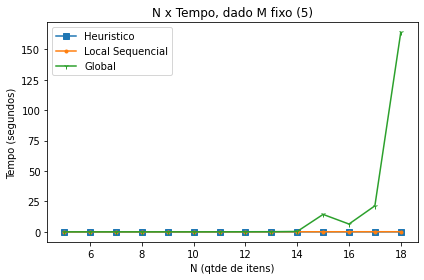

In [7]:
dfGlobalM = dfGlobalM.sort_values('N')

plt.plot(dfGlobalM['N'], dfGlobalM['T_Heuristico'], label="Heuristico", marker="s")
plt.plot(dfGlobalM['N'], dfGlobalM['T_Local'], label="Local Sequencial", marker=".")
plt.plot(dfGlobalM['N'], dfGlobalM['T_Global'], label="Global", marker="1")
plt.xlabel('N (qtde de itens)')
plt.ylabel('Tempo (segundos)')
plt.title("N x Tempo, dado M fixo (5)")
plt.legend()
plt.tight_layout()
plt.show()

Também é possível observar as diferentes soluções em relação ao MMS da solução. A busca global possui MMS ótimo, como esperado. A busca local, no entanto, alcança os mesmos valores em tempos muito mais razoáveis.

Como a estratégia delimitada envolve repetir a busca local um determinado número de vezes vezes (100000 vezes, como descrito no início dos testes), a probabilidade de se obter um ponto de máximo local que equivale ao máximo global é alto. Ao mesmo tempo que apresenta MMS ótimo, o tempo e os recursos consumidos pela local não chegam perto da global. Isso pode ser visto principalmente em entradas com muitos itens ou muitas pessoas, onde é viável executar a busca local mas não é viável executar a exaustiva.

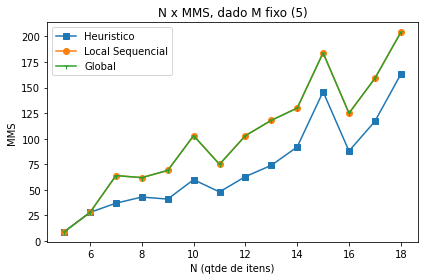

In [8]:
plt.plot(dfGlobalM['N'], dfGlobalM['MMS_Heuristico'], label="Heuristico", marker="s")
plt.plot(dfGlobalM['N'], dfGlobalM['MMS_Local'], label="Local Sequencial", marker="o")
plt.plot(dfGlobalM['N'], dfGlobalM['MMS_Global'], label="Global", marker="1")
plt.xlabel('N (qtde de itens)')
plt.ylabel('MMS')
plt.title("N x MMS, dado M fixo (5)")
plt.legend()
plt.tight_layout()
plt.show()

### Testes executados em todas as soluções, com N fixo:

In [9]:
insGlobal_N_fixo = getInputFiles("in*_N_global.txt")

resHeuristicoGlobal_N_fixo = geraDF(execs[0], insGlobal_N_fixo)
resLocalGlobal_N_fixo = geraDF(execs[1], insGlobal_N_fixo)
resGlobalGlobal_N_fixo = geraDF(execs[2], insGlobal_N_fixo)

dfGlobalN = pd.DataFrame()
dfGlobalN['N'] = resLocalGlobal_N_fixo['N']
dfGlobalN['M'] = resLocalGlobal_N_fixo['M']

dfGlobalN['MMS_Heuristico'] = resHeuristicoGlobal_N_fixo['MMS']
dfGlobalN['T_Heuristico'] = resHeuristicoGlobal_N_fixo['T']

dfGlobalN['MMS_Local'] = resLocalGlobal_N_fixo['MMS']
dfGlobalN['T_Local'] = resLocalGlobal_N_fixo['T']

dfGlobalN['MMS_Global'] = resGlobalGlobal_N_fixo['MMS']
dfGlobalN['T_Global'] = resGlobalGlobal_N_fixo['T']

In [10]:
dfGlobalN.sort_values('M').tail(5)

,N,M,MMS_Heuristico,T_Heuristico,MMS_Local,T_Local,MMS_Global,T_Global
0,14,4,133,0.004792,166,0.067179,166,0.010871
2,14,5,119,0.004627,156,0.067030,156,0.216780
3,14,6,126,0.004630,156,0.068221,156,1.736659
4,14,7,48,0.004631,94,0.081094,94,37.609220
5,14,8,77,0.004614,98,0.079480,98,82.946277


Variando o número de pessoas, é possível observar o mesmo resultado, que já era esperado dada a conclusão anterior. Mesmo utilizando uma estratégia para "cortar" algumas etapas da busca exaustiva, o tempo de execução volta a se comportar, eventualmente, como uma exponencial.  

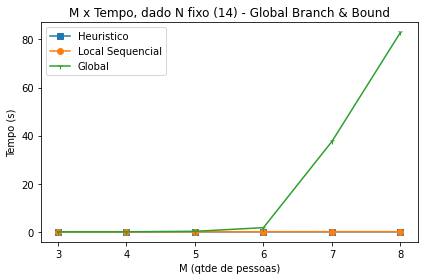

In [11]:
dfGlobalN = dfGlobalN.sort_values('M')

plt.plot(dfGlobalN['M'], dfGlobalN['T_Heuristico'], label="Heuristico", marker="s")
plt.plot(dfGlobalN['M'], dfGlobalN['T_Local'], label="Local Sequencial", marker="o")
plt.plot(dfGlobalN['M'], dfGlobalN['T_Global'], label="Global", marker="1")
plt.xlabel('M (qtde de pessoas)')
plt.ylabel('Tempo (s)')
plt.title("M x Tempo, dado N fixo (14) - Global Branch & Bound")
plt.legend()
plt.tight_layout()
plt.show()

É possível perceber a diferença entre realizar "cortes" na busca ou não realizá-los. A marca dos 30 segundos é atingida com 7 pessoas e 14 objetos (~ 678.22 bilhões de possibilidades) para o algoritmo que possui a estratégia de *branch and bound* (acima). Já para o algoritmo global que deve passar por todos os cenários (abaixo), os 50 segundos são atingidos com 5 pessoas e 12 itens (~ 244.14 milhões de possibilidades). Esses dados permitem concluir que é possível melhorar a performance da busca global. No entanto, a estratégia delimitada não é suficiente para superar os tempos reduzidos da busca local.

<p align="center">
<img src="relatorio/relatorio-final_files/globalSemOtimizacao.png" />
</p>

*Gráfico retirado do relatório intermediário, em que o algoritmo da busca global não possuia a estratégia delimitada e deveria percorrer todos os M^N cenários para atingir o melhor MMS.*

O mesmo caso obervado anteriormente para se repete para o MMS também. Os valores de MMS para as entradas geradas são bem próximas entre as diferentes soluções.

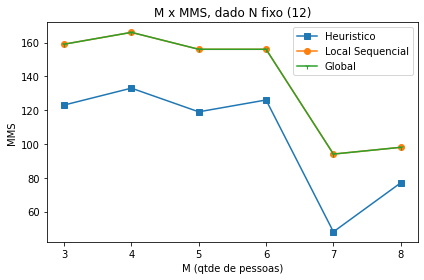

In [12]:
plt.plot(dfGlobalN['M'], dfGlobalN['MMS_Heuristico'], label="Heuristico", marker="s")
plt.plot(dfGlobalN['M'], dfGlobalN['MMS_Local'], label="Local Sequencial", marker="o")
plt.plot(dfGlobalN['M'], dfGlobalN['MMS_Global'], label="Global", marker="1")
plt.xlabel('M (qtde de pessoas)')
plt.ylabel('MMS')
plt.title("M x MMS, dado N fixo (12)")
plt.legend()
plt.tight_layout()
plt.show()

### Testes executados na solução heurística e local, com M fixo:

In [13]:
ins_M_fixo = getInputFiles("in*_M.txt")

resHeuristico_M_fixo = geraDF(execs[0], ins_M_fixo)
resLocal_M_fixo = geraDF(execs[1], ins_M_fixo)
resCPU_M_fixo = geraDF(execs[3], ins_M_fixo)
resGPU_M_fixo = geraDF(execs[4], ins_M_fixo)

dfM = pd.DataFrame()
dfM['N'] = resLocal_M_fixo['N']
dfM['M'] = resLocal_M_fixo['M']

dfM['MMS_Heuristico'] = resHeuristico_M_fixo['MMS']
dfM['T_Heuristico'] = resHeuristico_M_fixo['T']

dfM['MMS_Local'] = resLocal_M_fixo['MMS']
dfM['T_Local'] = resLocal_M_fixo['T']

dfM['MMS_CPU'] = resCPU_M_fixo['MMS']
dfM['T_CPU'] = resCPU_M_fixo['T']

dfM['MMS_GPU'] = resGPU_M_fixo['MMS']
dfM['T_GPU'] = resGPU_M_fixo['T']

In [14]:
dfM.sort_values('N').head(5)

,N,M,MMS_Heuristico,T_Heuristico,MMS_Local,T_Local,MMS_CPU,T_CPU,MMS_GPU,T_GPU
164,6,5,56,0.004763,63,0.032084,63,0.014928,63,0.092565
248,7,5,34,0.004815,40,0.036666,40,0.016221,40,0.088935
33,8,5,40,0.004682,57,0.043171,57,0.018468,57,0.091042
211,9,5,21,0.004717,37,0.047026,37,0.019896,37,0.087760
162,10,5,61,0.004798,99,0.055625,99,0.023524,99,0.083798


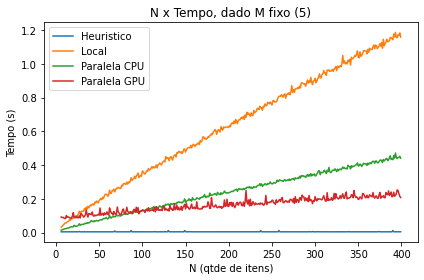

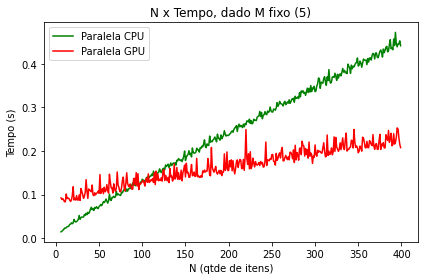

In [15]:
dfM = dfM.sort_values('N')

plt.plot(dfM['N'], dfM['T_Heuristico'], label="Heuristico")
plt.plot(dfM['N'], dfM['T_Local'], label="Local")
plt.plot(dfM['N'], dfM['T_CPU'], label="Paralela CPU")
plt.plot(dfM['N'], dfM['T_GPU'], label="Paralela GPU")
plt.xlabel('N (qtde de itens)')
plt.ylabel('Tempo (s)')
plt.title("N x Tempo, dado M fixo (5)")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(dfM['N'], dfM['T_CPU'], 'g', label="Paralela CPU")
plt.plot(dfM['N'], dfM['T_GPU'], 'r', label="Paralela GPU")
plt.xlabel('N (qtde de itens)')
plt.ylabel('Tempo (s)')
plt.title("N x Tempo, dado M fixo (5)")
plt.legend()
plt.tight_layout()
plt.show()

Apesar do tempo de execução da busca local crescer quase que linearmente, enquanto o tempo da heurística permanece praticamente constante, o MMS da local é melhor que o heurístico. 

Retomando os cenários da busca global, demorariam milhares de horas para encontrar a solução ótima para 5 pessoas e 90 itens, por exemplo. A busca local se destaca nesse aspecto; é possível obter uma solução ótima (ou pelo menos bem próxima) que funciona para entradas grandes e é executada em um tempo muito menor que da global.

Além da comparação entre local e heurística anterior, vale ressaltar as melhorias (em relação ao tempo) obtidas nas buscas locais com paralelismo em CPU ou GPU. Como esperado, o MMS é o mesmo, independente da versão do algoritmo (paralela em CPU ou GPU e sem paralelismo). 

Para a paralela em CPU, o tempo de execução diminui com base na quantidade de threads disponíveis. Como a máquina utilizada para a execução desses testes possui 4 *cores*, era esperado que o tempo fosse reduzido em quase 1/4 (no mundo ideal). No entanto, o que realmente é observado é uma redução de aproximadamente 2/3 da local sequencial. Mesmo assim, ainda não é possível igualar ao tempo da heurística, dada a natureza das operações e complexidade do problema.

Outro fato relevante para esses casos remete ao custo fixo de realizar operações em GPU. Existe um overhead para a parte sequencial do programa. Assim, é possível obervar que o desempenho da GPU é pior que a implementação sequencial e paralela em CPU para entradas reduzidas (nesse teste, menos que 100 objetos). Isso leva a conclusão de que não é necessário paralelizar um programa só porque existe essa possibilidade. 

Para entradas suficientemente grandes, o paralelismo em GPU começa a superar ambas as locais, devido a quantidade de *threads* que a GPU possui. No entanto, como a GPU executa a parte paralela do programa em *chunks*, a melhora no tempo de execução é limitada pela quantidade de *chunks* que estarão em execução simultaneamente, além do tempo fixo para alocação de memória, por exemplo. Mesmo assim não é melhor que a heurística (em relação ao tempo de execução).

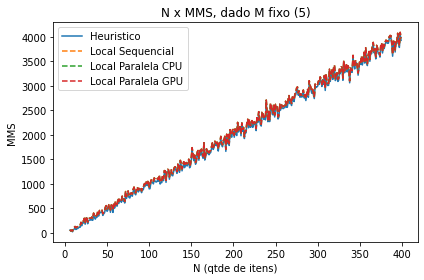

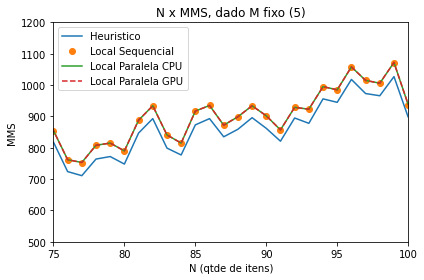

In [16]:
plt.plot(dfM['N'], dfM['MMS_Heuristico'], label="Heuristico")
plt.plot(dfM['N'], dfM['MMS_Local'], '--',  label="Local Sequencial")
plt.plot(dfM['N'], dfM['MMS_CPU'], '--', label="Local Paralela CPU")
plt.plot(dfM['N'], dfM['MMS_GPU'], '--', label="Local Paralela GPU")
plt.xlabel('N (qtde de itens)')
plt.ylabel('MMS')
plt.title("N x MMS, dado M fixo (5)")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(dfM['N'], dfM['MMS_Heuristico'], label="Heuristico")
plt.plot(dfM['N'], dfM['MMS_Local'], 'o',  label="Local Sequencial")
plt.plot(dfM['N'], dfM['MMS_CPU'], label="Local Paralela CPU")
plt.plot(dfM['N'], dfM['MMS_GPU'], '--', label="Local Paralela GPU")
plt.xlabel('N (qtde de itens)')
plt.ylabel('MMS')
plt.title("N x MMS, dado M fixo (5)")
plt.legend()
plt.xlim((75, 100))
plt.ylim((500, 1200))
plt.tight_layout()
plt.show()

Ainda em relação ao MMS, no gráfico anterior, não é muito óbvia a diferença entre as duas soluções, dada a escala utilizada. A diferença no MMS obtido pela local é significante, quando comparada com o MMS obtido pela heurística.

### Testes executados na solução heurística e local, com N fixo:

In [17]:
ins_N_fixo = getInputFiles("in*_N.txt")

resHeuristico_N_fixo = geraDF(execs[0], ins_N_fixo)
resLocal_N_fixo = geraDF(execs[1], ins_N_fixo)
resCPU_N_fixo = geraDF(execs[3], ins_N_fixo)
resGPU_N_fixo = geraDF(execs[4], ins_N_fixo)

dfN = pd.DataFrame()
dfN['N'] = resLocal_N_fixo['N']
dfN['M'] = resLocal_N_fixo['M']

dfN['MMS_Heuristico'] = resHeuristico_N_fixo['MMS']
dfN['T_Heuristico'] = resHeuristico_N_fixo['T']

dfN['MMS_Local'] = resLocal_N_fixo['MMS']
dfN['T_Local'] = resLocal_N_fixo['T']

dfN['MMS_CPU'] = resCPU_N_fixo['MMS']
dfN['T_CPU'] = resCPU_N_fixo['T']

dfN['MMS_GPU'] = resGPU_N_fixo['MMS']
dfN['T_GPU'] = resGPU_N_fixo['T']

In [18]:
dfN.sort_values('M').head(5)

,N,M,MMS_Heuristico,T_Heuristico,MMS_Local,T_Local,MMS_CPU,T_CPU,MMS_GPU,T_GPU
2,30,2,693,0.006110,712,0.096079,712,0.039555,712,0.085335
11,30,3,467,0.005024,492,0.104655,492,0.042325,492,0.131628
13,30,4,398,0.004850,435,0.116548,435,0.046271,435,0.127507
12,30,5,218,0.004912,250,0.136271,250,0.053157,250,0.127286
9,30,7,147,0.004835,191,0.155067,191,0.071078,191,0.144016


Como visto para os testes com M fixo, o tempo que a busca local leva para ser executada cresce com o tamanho das entradas. 

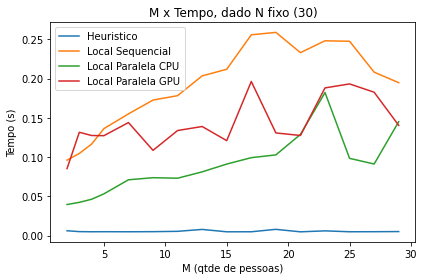

In [19]:
dfN = dfN.sort_values('M')

plt.plot(dfN['M'], dfN['T_Heuristico'], label="Heuristico")
plt.plot(dfN['M'], dfN['T_Local'], label="Local Sequencial")
plt.plot(dfN['M'], dfN['T_CPU'], label="Local Paralela CPU")
plt.plot(dfN['M'], dfN['T_GPU'], label="Local Paralela GPU")
plt.xlabel('M (qtde de pessoas)')
plt.ylabel('Tempo (s)')
plt.title("M x Tempo, dado N fixo (30)")
plt.legend()
plt.tight_layout()
plt.show()

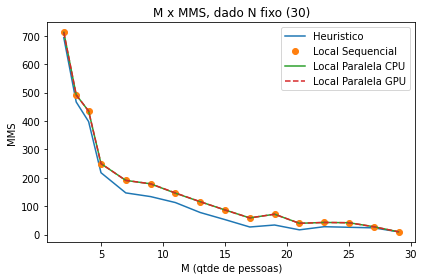

In [20]:
plt.plot(dfN['M'], dfN['MMS_Heuristico'], label="Heuristico")
plt.plot(dfN['M'], dfN['MMS_Local'], 'o', label="Local Sequencial")
plt.plot(dfN['M'], dfN['MMS_CPU'], label="Local Paralela CPU")
plt.plot(dfN['M'], dfN['MMS_GPU'], '--', label="Local Paralela GPU")
plt.xlabel('M (qtde de pessoas)')
plt.ylabel('MMS')
plt.title("M x MMS, dado N fixo (30)")
plt.legend()
plt.tight_layout()
plt.show()

Nesses testes com N fixo, o mesmo padrão percebido anteriormente se repete. Na maioria dos casos a variação de MMS entre as soluções local e heurística são relevantes. 

Vale ressaltar que a busca local encontra uma distribuição de "máximo local", por causa da distribuição aleatória dos itens para as pessoas. Novamente, dada a estratégia adotada, é provável encontrarmos uma resposta ótima para uma distribuição. No entanto ainda é possível que o ponto ótimo não seja encontrado. No caso médio, no entanto, a busca local acaba sendo a melhor solução, quando consideramos tanto o seu tempo (se comparada a global) e a qualidade do resultado (se comparada a heurística).

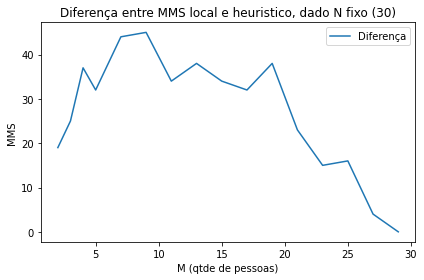

In [21]:
plt.plot(dfN['M'], dfN['MMS_Local'] - dfN['MMS_Heuristico'], label="Diferença")
plt.xlabel('M (qtde de pessoas)')
plt.ylabel('MMS')
plt.title("Diferença entre MMS local e heuristico, dado N fixo (30)")
plt.legend()
plt.tight_layout()
plt.show()

### Testes executados na solução heurística e local, com itens com valores semelhantes:

Por causa do resultado anterior, uma nova análise pode ser realizada.

A busca heurística não é ruim, como aparenta ser dados os testes anteriores. Para casos em que os itens possuem valores muito parecidos, o resultado da heurística é equiparável tanto ao da local quanto da global.

Nos testes seguintes tanto N quanto M foram variados, e os itens possuem valores próximos. 

Nos gráficos, um dos eixos foi fixado como o número de itens por simplicidade, visto que o intuito dessa análise é a qualidade das diferentes soluções.

In [22]:
insValor = getInputFiles("in*_valor.txt")

resHeuristicoValor = geraDF(execs[0], insValor)
resLocalValor = geraDF(execs[1], insValor)
resGlobalValor = geraDF(execs[2], insValor)
resCPUValor = geraDF(execs[3], insValor)
resGPUValor = geraDF(execs[4], insValor)

dfValor = pd.DataFrame()
dfValor['N'] = resLocalValor['N']
dfValor['M'] = resLocalValor['M']

dfValor['MMS_Heuristico'] = resHeuristicoValor['MMS']
dfValor['T_Heuristico'] = resHeuristicoValor['T']

dfValor['MMS_Local'] = resLocalValor['MMS']
dfValor['T_Local'] = resLocalValor['T']

dfValor['MMS_Global'] = resGlobalValor['MMS']
dfValor['T_Global'] = resGlobalValor['T']

dfValor['MMS_CPU'] = resCPUValor['MMS']
dfValor['T_CPU'] = resCPUValor['T']

dfValor['MMS_GPU'] = resGPUValor['MMS']
dfValor['T_GPU'] = resGPUValor['T']

In [23]:
dfValor = dfValor.sort_values('N')
dfValor.head(5)

,N,M,MMS_Heuristico,T_Heuristico,MMS_Local,T_Local,MMS_Global,T_Global,MMS_CPU,T_CPU,MMS_GPU,T_GPU
4,5,5,95,0.006237,95,0.029473,95,0.004998,95,0.013529,95,0.102388
2,6,5,95,0.007792,97,0.034754,97,0.006295,97,0.015150,97,0.083705
6,7,5,96,0.005245,100,0.041800,100,0.006110,100,0.017609,100,0.096746
1,8,5,97,0.007212,100,0.045417,100,0.007491,100,0.017731,100,0.110248
0,9,5,99,0.008036,100,0.043320,100,0.009688,100,0.019928,100,0.167072


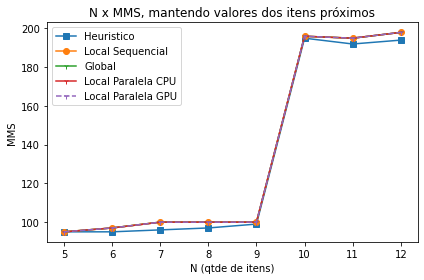

In [24]:
plt.plot(dfValor['N'], dfValor['MMS_Heuristico'], label="Heuristico", marker="s")
plt.plot(dfValor['N'], dfValor['MMS_Local'], label="Local Sequencial", marker="o")
plt.plot(dfValor['N'], dfValor['MMS_Global'], label="Global", marker="1")
plt.plot(dfValor['N'], dfValor['MMS_CPU'], label="Local Paralela CPU", marker="1")
plt.plot(dfValor['N'], dfValor['MMS_GPU'], '--', label="Local Paralela GPU", marker="1")
plt.xlabel('N (qtde de itens)');
plt.ylabel('MMS')
plt.title("N x MMS, mantendo valores dos itens próximos")
plt.legend()
plt.tight_layout()
plt.show()

Nesse caso, há um pulo no valor do MMS simplesmente porque cada pessoa passou a receber pelo menos dois 2 itens. O valor bem próximo, se não igual, entre o MMS das soluções fica em evidência.

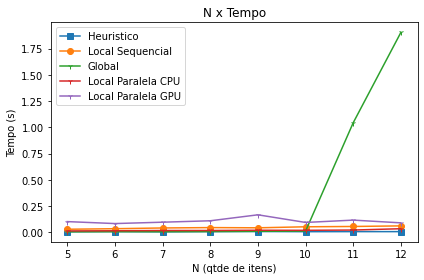

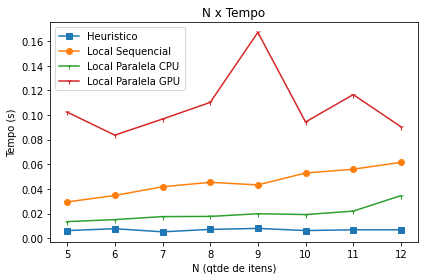

In [25]:
plt.plot(dfValor['N'], dfValor['T_Heuristico'], label="Heuristico", marker="s")
plt.plot(dfValor['N'], dfValor['T_Local'], label="Local Sequencial", marker="o")
plt.plot(dfValor['N'], dfValor['T_Global'], label="Global", marker="1")
plt.plot(dfValor['N'], dfValor['T_CPU'], label="Local Paralela CPU", marker="1")
plt.plot(dfValor['N'], dfValor['T_GPU'], label="Local Paralela GPU", marker="1")
plt.xlabel('N (qtde de itens)')
plt.ylabel('Tempo (s)')
plt.title("N x Tempo")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(dfValor['N'], dfValor['T_Heuristico'], label="Heuristico", marker="s")
plt.plot(dfValor['N'], dfValor['T_Local'], label="Local Sequencial", marker="o")
plt.plot(dfValor['N'], dfValor['T_CPU'], label="Local Paralela CPU", marker="1")
plt.plot(dfValor['N'], dfValor['T_GPU'], label="Local Paralela GPU", marker="1")
plt.xlabel('N (qtde de itens)')
plt.ylabel('Tempo (s)')
plt.title("N x Tempo")
plt.legend()
plt.tight_layout()
plt.show()

Como esperado, o tempo da heurística e da local continuam inferiores ao da global (1° gráfico acima), e o tempo das locais é marginalmente superior ao da heurística (2° gráfico acima). A local em GPU não performa bem nesse teste dado o custo fixo de utilizá-la, característica abordada anteriormente.

## Conclusão

Tendo os testes e resultados acima como base, a conclusão que pode ser tirada é que nenhuma solução é melhor que a outra. Tudo depende do cenário (as entradas). Dados cenários diversos, com entradas grandes, que dificilmente seriam executados na global, ou com objetos de valores muito diferentes, que remetem a "fraqueza" da heurística, a busca local sequencial e suas versões em paralelo se destacam. 

Comparando as locais, em específico as paralelas, é possível concluir que tudo depende do cenário. Não adianta paralelizar com GPU uma entrada pequena.